<a href="https://colab.research.google.com/github/sHiVaNgI821/Balanced-Bites/blob/master/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2


%matplotlib inline
print(tf.__version__)
print(tf.test.gpu_device_name())

2.2.0
/device:GPU:0


In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
!ls

sample_data


In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pwd

/content


In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!cd ~/.kaggle

/bin/bash: line 0: cd: /root/.kaggle: No such file or directory


In [ ]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
!cd ~/.kaggle

/bin/bash: line 0: cd: /root/.kaggle: No such file or directory


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dansbecker/food-101

100% 9.37G/9.38G [03:42<00:00, 34.1MB/s]
100% 9.38G/9.38G [03:42<00:00, 45.2MB/s]


In [ ]:
!ls

food-101.zip  kaggle.json  sample_data


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: food-101/food-101/images/tacos/1033196.jpg  
  inflating: food-101/food-101/images/tacos/1036030.jpg  
  inflating: food-101/food-101/images/tacos/1042175.jpg  
  inflating: food-101/food-101/images/tacos/1044043.jpg  
  inflating: food-101/food-101/images/tacos/1058697.jpg  
  inflating: food-101/food-101/images/tacos/1059239.jpg  
  inflating: food-101/food-101/images/tacos/1059326.jpg  
  inflating: food-101/food-101/images/tacos/1066762.jpg  
  inflating: food-101/food-101/images/tacos/1070967.jpg  
  inflating: food-101/food-101/images/tacos/1073468.jpg  
  inflating: food-101/food-101/images/tacos/1075296.jpg  
  inflating: food-101/food-101/images/tacos/1085243.jpg  
  inflating: food-101/food-101/images/tacos/108529.jpg  
  inflating: food-101/food-101/images/tacos/1086014.jpg  
  inflating: food-101/food-101/images/tacos/108945.jpg  
  inflating: food-101/food-101/images/tacos/1089575.jpg  
  inflating: food-101/f

In [ ]:
!ls

food-101  kaggle.json  sample_data


In [ ]:
!ls food-101

food-101  __MACOSX


In [ ]:
%cd food-101/

/content/food-101/food-101


In [ ]:
!ls

images	license_agreement.txt  meta  README.txt


In [ ]:
%cd food-101/

/content/food-101/food-101


In [ ]:
!ls

food-101  __MACOSX


In [ ]:
os.listdir('images')

['hummus',
 'ceviche',
 'chicken_quesadilla',
 'clam_chowder',
 'garlic_bread',
 'escargots',
 'beef_tartare',
 'strawberry_shortcake',
 'hot_dog',
 'prime_rib',
 'lobster_bisque',
 'steak',
 'gnocchi',
 'french_toast',
 'dumplings',
 'peking_duck',
 '.DS_Store',
 'paella',
 'macaroni_and_cheese',
 'mussels',
 'takoyaki',
 'club_sandwich',
 'cheese_plate',
 'guacamole',
 'falafel',
 'apple_pie',
 'oysters',
 'chocolate_mousse',
 'seaweed_salad',
 'samosa',
 'baklava',
 'pizza',
 'grilled_salmon',
 'spaghetti_carbonara',
 'pad_thai',
 'onion_rings',
 'beet_salad',
 'poutine',
 'cheesecake',
 'frozen_yogurt',
 'filet_mignon',
 'bibimbap',
 'bruschetta',
 'chicken_curry',
 'sashimi',
 'spaghetti_bolognese',
 'hot_and_sour_soup',
 'risotto',
 'scallops',
 'beef_carpaccio',
 'cup_cakes',
 'croque_madame',
 'caprese_salad',
 'gyoza',
 'sushi',
 'tuna_tartare',
 'french_fries',
 'caesar_salad',
 'chicken_wings',
 'foie_gras',
 'carrot_cake',
 'edamame',
 'macarons',
 'churros',
 'deviled_eggs

In [ ]:
os.listdir('meta')

['test.json',
 'classes.txt',
 'test.txt',
 'labels.txt',
 'train.json',
 'train.txt']

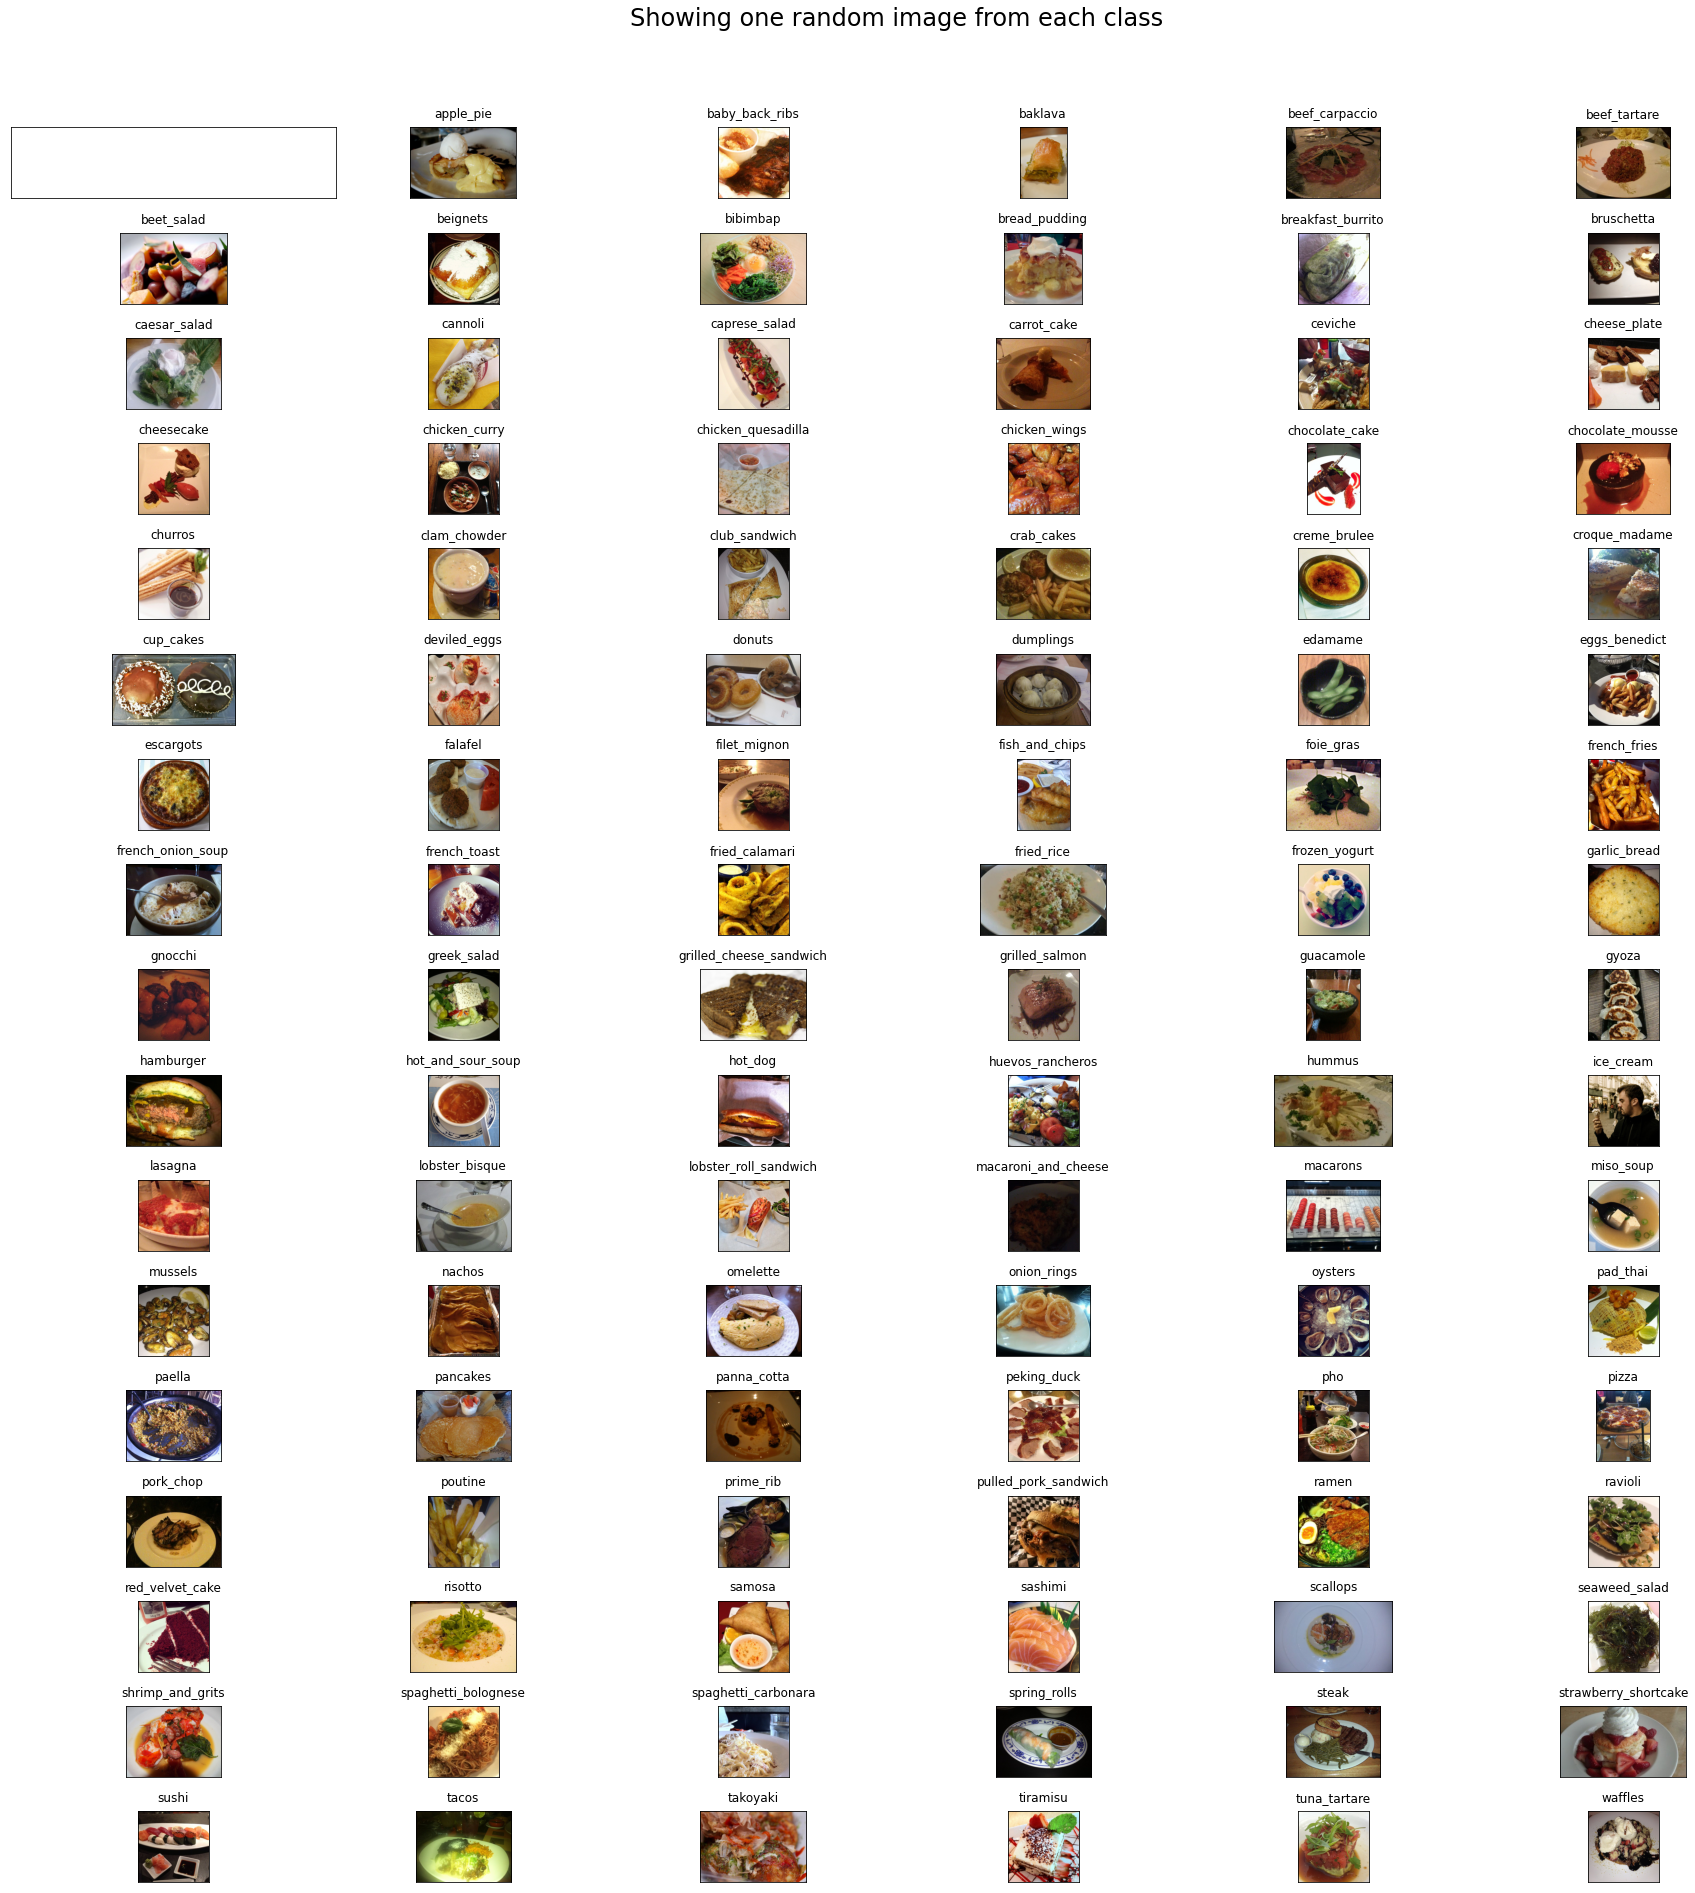

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images)
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [ ]:
%cd ..

/content/food-101


In [ ]:
!ls

food-101  __MACOSX


In [ ]:
%cd food-101/food-101

[Errno 2] No such file or directory: 'food-101/food-101'
/content/food-101


In [ ]:
%cd food-101/

/content/food-101/food-101


In [ ]:
!ls

images	license_agreement.txt  meta  README.txt


In [ ]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
print("Creating train data...")
prepare_data('meta/train.txt', 'images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
prepare_data('meta/test.txt', 'images', 'test')


Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

In [ ]:
!find train -type d -or -type f -printf '.' | wc -c

75750


In [ ]:
!find test -type d -or -type f -printf '.' | wc -c

25250


In [ ]:
del foods_sorted[0]

In [ ]:
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
food_list = ['apple_pie','pizza','omelette','spring_rolls']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Copying images into spring_rolls


In [ ]:
!find train_mini -type d -or -type f -printf '.' | wc -c

3000


In [ ]:
dataset_mini(food_list, src_test, dest_test)
!find test_mini -type d -or -type f -printf '.' | wc -c

Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Copying images into spring_rolls
1000


In [ ]:
!ls

images		       meta	   test       train
license_agreement.txt  README.txt  test_mini  train_mini


In [ ]:
!ls test_mini

apple_pie  omelette  pizza  spring_rolls


In [ ]:
NUM_CLASSES = 101

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']
# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 40
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 150
BATCH_SIZE_VALIDATION = 50
BATCH_SIZE_TESTING = 1


In [ ]:
pip list | grep Keras

Keras                    2.3.1          
Keras-Applications       1.0.8          
Keras-Preprocessing      1.1.2          


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
!ls resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

ls: cannot access 'resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5': No such file or directory


In [ ]:
#resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 101)               206949    
Total params: 23,794,661
Trainable params: 206,949
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
!pwd

/content/food-101/food-101


In [ ]:
!ls

images		       meta	   test       train
license_agreement.txt  README.txt  test_mini  train_mini


In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = data_generator.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'test',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [ ]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(100, 758, 100, 253)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'weights.best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
nb_train_samples = 75750
nb_validation_samples = 25250
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples//BATCH_SIZE_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples//BATCH_SIZE_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("weights.best.hdf5")

Epoch 1/40
505/505 [==============================] - 651s 1s/step - loss: 2.0916 - accuracy: 0.4887 - val_loss: 1.4460 - val_accuracy: 0.6183
Epoch 2/40
505/505 [==============================] - 649s 1s/step - loss: 1.5146 - accuracy: 0.6126 - val_loss: 1.3278 - val_accuracy: 0.6441
Epoch 3/40
505/505 [==============================] - 604s 1s/step - loss: 1.3558 - accuracy: 0.6499 - val_loss: 1.2560 - val_accuracy: 0.6633
Epoch 4/40
505/505 [==============================] - 593s 1s/step - loss: 1.2541 - accuracy: 0.6757 - val_loss: 1.2529 - val_accuracy: 0.6626
Epoch 5/40
410/505 [=======================>......] - ETA: 1:21 - loss: 1.1767 - accuracy: 0.6923

In [ ]:
!wget https://image.shutterstock.com/image-photo/hot-pizza-slice-melting-cheese-260nw-378226756.jpg

--2020-07-18 07:02:08--  https://image.shutterstock.com/image-photo/hot-pizza-slice-melting-cheese-260nw-378226756.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 2.19.241.178
Connecting to image.shutterstock.com (image.shutterstock.com)|2.19.241.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31035 (30K) [image/jpeg]
Saving to: ‘hot-pizza-slice-melting-cheese-260nw-378226756.jpg’

hot-pizza-slice-mel 100%[===================>]  30.31K  --.-KB/s    in 0.007s  

2020-07-18 07:02:08 (4.00 MB/s) - ‘hot-pizza-slice-melting-cheese-260nw-378226756.jpg’ saved [31035/31035]



In [ ]:
!ls

hot-pizza-slice-melting-cheese-260nw-378226756.jpg  test
images						    test_mini
license_agreement.txt				    train
meta						    train_mini
README.txt					    weights.best.hdf5


In [ ]:
!mv hot-pizza-slice-melting-cheese-260nw-378226756.jpg pizza_test.jpg

In [ ]:
!ls

images		       meta	       README.txt  test_mini  train_mini
license_agreement.txt  pizza_test.jpg  test	   train      weights.best.hdf5


In [ ]:
!ls test_mini

apple_pie  omelette  pizza  spring_rolls


In [ ]:
from PIL import Image
img=Image.open('pizza_test.jpg')
img_arr = np.array(img,dtype=float)
# Originally the pixel values are in the range [0,255], we rescale it to [0,1] because plt expects it that way
img_arr /= 255 
print(img_arr.shape)

(280, 362, 3)


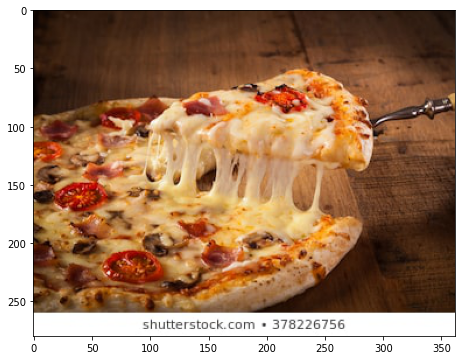

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(img_arr)
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
img_path = 'pizza_test.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print(preds)

[[7.0370905e-02 1.3814513e-03 9.2819130e-01 5.6338940e-05]]
